In [1]:
# import dagshub
# dagshub.init(repo_owner='akasharan-a', repo_name='Weather_forecasting_with_MLOps', mlflow=True)

# import mlflow
# with mlflow.start_run():
#   mlflow.log_param('parameter name', 'value')
#   mlflow.log_metric('metric name', 1)

In [ ]:
import pandas as pd
import os
import numpy as np
from dotenv import load_dotenv
from darts import TimeSeries 
data = pd.read_csv("../mlops_services/data/historical_weather_data_blr.csv",header=3,parse_dates=['time'])
data.head()

,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),rain (mm),weather_code (wmo code),surface_pressure (hPa),cloud_cover (%),et0_fao_evapotranspiration (mm),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_gusts_10m (km/h),is_day ()
0,2023-01-01 00:00:00,16.2,74,11.7,0.0,0,914.8,1,0.02,0.47,9.4,97,15.1,0
1,2023-01-01 01:00:00,16.1,75,11.6,0.0,0,914.1,0,0.02,0.46,9.8,96,16.2,0
2,2023-01-01 02:00:00,15.6,80,12.1,0.0,3,913.3,83,0.01,0.36,9.8,96,16.2,0
3,2023-01-01 03:00:00,15.3,84,12.7,0.0,2,913.0,78,0.00,0.27,10.2,100,16.9,0
4,2023-01-01 04:00:00,14.8,89,13.1,0.0,2,912.9,61,0.00,0.18,9.1,99,16.9,0


In [ ]:
load_dotenv('../secrets.env')

In [3]:
data.tail()

,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),rain (mm),weather_code (wmo code),surface_pressure (hPa),cloud_cover (%),et0_fao_evapotranspiration (mm),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_gusts_10m (km/h),is_day ()
22081,2025-07-09 01:00:00,20.8,89,19.0,0.0,2,909.9,51,0.01,0.27,13.8,252,32.0,0
22082,2025-07-09 02:00:00,20.4,89,18.6,0.0,2,909.2,60,0.00,0.25,13.4,252,31.0,0
22083,2025-07-09 03:00:00,20.0,91,18.4,0.0,3,908.9,94,0.00,0.21,12.6,251,30.2,0
22084,2025-07-09 04:00:00,19.7,92,18.4,0.0,3,908.9,94,0.00,0.18,13.6,250,29.5,0
22085,2025-07-09 05:00:00,19.6,92,18.2,0.0,3,909.1,100,0.00,0.19,14.6,252,32.0,0


In [4]:
data['month'] = data['time'].dt.month
data['hour'] = data['time'].dt.hour
normalized_hours = ((data['time'].dt.hour / 24) * 2 * np.pi) - ((2 / 24) * 2 * np.pi)
data['daily_cycle'] = (-np.cos(normalized_hours) + 1) / 2

In [5]:
from darts.utils.model_selection import train_test_split
y = 'temperature_2m (°C)'
x_past = [ 'relative_humidity_2m (%)',
       'dew_point_2m (°C)', 'rain (mm)', 'weather_code (wmo code)',
       'surface_pressure (hPa)', 'cloud_cover (%)',
       'et0_fao_evapotranspiration (mm)', 'vapour_pressure_deficit (kPa)',
       'wind_speed_10m (km/h)', 'wind_direction_10m (°)',
       'wind_gusts_10m (km/h)']
x_future = ['hour','month'] #daily_cycle


In [6]:
series = TimeSeries.from_dataframe(data,time_col='time', value_cols=data.columns[1:].values,fill_missing_dates=True)
series = series[:pd.Timestamp('2024-12-31 23:00')]

series_train,series_test  = train_test_split(series,test_size=0.25)

<Axes: xlabel='time'>

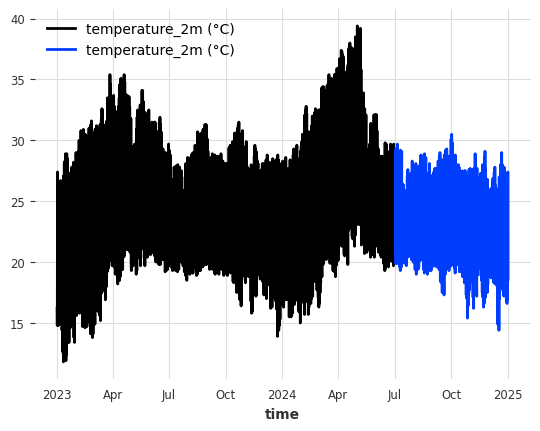

In [7]:

train_y,test_y =  series_train[y] , series_test[y]
train_X_past,test_X_past = series_train[x_past] , series_test[x_past]
train_X_future,test_X_future = series_train[x_future] , series_test[x_future]

train_y.plot()
test_y.plot()

In [8]:
from darts.models import XGBModel 
# model_xgb =  XGBModel(
#     lags=72,
#     lags_past_covariates=72,lags_future_covariates=[24,24],
#     output_chunk_length=24,
#     random_state= 100)

# model_xgb.fit(train_y,train_X_past ,train_X_future)
# model_xgb.save('xgb.model')

Support for PyTorch based likelihood models not available. To enable them, install "darts", "u8darts[torch]" or "u8darts[all]" (with pip); or "u8darts-torch" or "u8darts-all" (with conda).
Support for Torch based models not available. To enable them, install "darts", "u8darts[torch]" or "u8darts[all]" (with pip); or "u8darts-torch" or "u8darts-all" (with conda).
/home/legacy/Projects/Weather_forecasting_with_MLOps/.venv/lib/python3.13/site-packages/fs/__init__.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  __import__("pkg_resources").declare_namespace(__name__)  # type: ignore
/home/legacy/Projects/Weather_forecasting_with_MLOps/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.i

In [9]:
model_xgb = XGBModel.load('xgb.model')

In [10]:
from darts.metrics import metrics

In [11]:
rmse,mape = model_xgb.backtest(test_y,test_X_past ,test_X_future,forecast_horizon=24,last_points_only =False,retrain=False,metric=[metrics.rmse,metrics.mape])

In [12]:
rmse,mape

(np.float64(0.9684841885497373), np.float64(3.347183336370535))

In [ ]:

os.environ["MLFLOW_TRACKING_USERNAME"] ,os.environ["MLFLOW_TRACKING_PASSWORD"]

In [14]:
# import dagshub
# dagshub.init(repo_owner='akasharan-a', repo_name='Weather_forecasting_with_MLOps', mlflow=True)


In [15]:
import mlflow.pyfunc
import mlflow.pyfunc
import pandas as pd

class DartsForecastModel(mlflow.pyfunc.PythonModel):
    # def __init__(self, darts_model):
    #     self.darts_model = None#darts_model
        
    def load_context(self, context):
        self.darts_model = None
    
    def predict(self, context, model_input):
        # model_input: dict with 'series' and 'horizon'
        # series = model_input["series"]
        # series_X_past = model_input["series_X_past"]
        # series_X_future = model_input["series_X_future"]
        # horizon = model_input["horizon"]
        # forecast = self.darts_model.predict(horizon,series=series,past_covariates=series_X_past,future_covariates=series_X_future)
        return  {'a':[1,0]}# forecast.values()


/home/legacy/Projects/Weather_forecasting_with_MLOps/.venv/lib/python3.13/site-packages/mlflow/pyfunc/utils/data_validation.py:186: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


In [ ]:
# !uv pip freeze

Using Python 3.13.5 environment at: /home/legacy/Projects/Weather_forecasting_with_MLOps/.venv
adagio==0.2.6
aiohappyeyeballs==2.6.1
aiohttp==3.12.14
aiohttp-retry==2.9.1
aiosignal==1.4.0
alembic==1.16.4
amqp==5.3.1
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.9.0
appdirs==1.4.4
asttokens==3.0.0
asyncssh==2.21.0
atpublic==6.0.1
attrs==25.3.0
backoff==2.2.1
billiard==4.2.1
blinker==1.9.0
boto3==1.39.9
botocore==1.39.9
cachetools==5.5.2
celery==5.5.3
certifi==2025.7.14
cffi==1.17.1
charset-normalizer==3.4.2
click==8.2.1
click-didyoumean==0.3.1
click-plugins==1.1.1.2
click-repl==0.3.0
cloudpickle==3.1.1
colorama==0.4.6
comm==0.2.2
configobj==5.0.9
contourpy==1.3.2
coreforecast==0.0.16
cryptography==45.0.5
cycler==0.12.1
dacite==1.6.0
dagshub==0.5.10
dagshub-annotation-converter==0.1.11
dash==3.1.1
databricks-sdk==0.59.0
dataclasses-json==0.6.7
debugpy==1.8.14
decorator==5.2.1
dictdiffer==0.9.0
diskcache==5.6.3
distro==1.9.0
docker==7.1.0
dpath==2.2.0
dulwich==0.23.2
dvc==

In [37]:
PYTHON_VERSION = "3.13.5"

conda_env = {
    'channels': ['defaults'],
    'dependencies': [
        'python~={}'.format(PYTHON_VERSION),
        'pip',
          {
            'pip': [
                'mlflow',
                'u8darts==0.36.0'
            ],
          },
    ],
    'name': 'squirrel_env'
}

In [ ]:
# with mlflow.start_run():
#     mlflow.log_param("model_type", "XGB")  # example
#     mlflow.log_metric("rmse", rmse)
#     mlflow.log_metric("mape", mape)
#     mlflow.pyfunc.log_model(
#         name="darts_pyfunc_model",
#         python_model=DartsForecastModel(),
#         conda_env=conda_env
#     )

2025/07/20 12:21:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [ ]:
mlflow.set_tracking_uri("https://dagshub.com/akasharan-a/Weather_forecasting_with_MLOps.mlflow")
with mlflow.start_run(experiment_id=1):
    mlflow.log_param("model_type", "XGB")  # example
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("mape", mape)
    mlflow.pyfunc.log_model(
        name="darts_pyfunc_model",
        python_model=DartsForecastModel(),
        conda_env=conda_env
    )

🏃 View run puzzled-ape-400 at: https://dagshub.com/akasharan-a/Weather_forecasting_with_MLOps.mlflow/#/experiments/1/runs/9aadf02aad7f44cc9eec83b6a92172e7
🧪 View experiment at: https://dagshub.com/akasharan-a/Weather_forecasting_with_MLOps.mlflow/#/experiments/1


RestException: INTERNAL_ERROR: Response: {'error': 'unsupported endpoint, please contact support@dagshub.com'}

In [26]:
x= mlflow.get_experiment_by_name('test1')

In [ ]:
import mlflow
mlflow.set_tracking_uri("https://dagshub.com/akasharan-a/Weather_forecasting_with_MLOps.mlflow")
import mlflow.pyfunc
# mlflow.create_experiment('Test')
class DartsForecastModel(mlflow.pyfunc.PythonModel):
    def _init_(self,darts_model):
        self.model = darts_model
    
    def predict(self, context, model_input, params):
        # model_input: DataFrame or numpy array to TimeSeries as needed
        ts = model_input.copy()
        ts_y = ts[y]
        ts_x_past = ts[x_past]
        ts_x_future = ts[x_future]
        forcast_horizon = params["horizon"]
        # You may allow passing prediction length via context or hardcode
        return self.model.predict(forcast_horizon, series=ts_y,past_covariates=ts_x_past,future_covariates=ts_x_future)
    
# # # Saving a Pyfunc-wrapped model in MLflow
# # mlflow.pyfunc.save_model(
# #     path="darts_xgb",
# #     python_model=DartsForecastModel(),
# #     artifacts=artifacts
# )


with mlflow.start_run(experiment_id=1):
    mlflow.log_param("model_type", "XGB")  # example
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("mape", mape)
    # Log to MLflow as a model artifact
    mlflow.pyfunc.log_model(
        artifact_path="darts_xgb",
        python_model=DartsForecastModel(model_xgb),
    )    

/home/legacy/Projects/Weather_forecasting_with_MLOps/.venv/lib/python3.13/site-packages/mlflow/pyfunc/utils/data_validation.py:155: FutureWarning: Model's `predict` method contains invalid parameters: {'horizon'}. Only the following parameter names are allowed: context, model_input, and params. Note that invalid parameters will no longer be permitted in future versions.
  param_names = _check_func_signature(func, "predict")
/home/legacy/Projects/Weather_forecasting_with_MLOps/.venv/lib/python3.13/site-packages/mlflow/pyfunc/utils/data_validation.py:186: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run peaceful-lark-697 at: https://dagshub.com/akasharan-a/Weather_forecasting_with_MLOps.mlflow/#/experiments/1/runs/c1d1c66c196e4ce0a3ae5866581b8207
🧪 View experiment at: https://dagshub.com/akasharan-a/Weather_forecasting_with_MLOps.mlflow/#/experiments/1


TypeError: DartsForecastModel() takes no arguments